In [21]:
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import sim.fitting
import sim.fitting_machinery
import sim.importing
import sim.log_similarity
import sim.petrinet_replay
import sim.replay_tracking
import sim.simulation
import sim.viz
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
plt.rcParams.update({'figure.autolayout': True})
#plt.style.use('seaborn-pastel')
sns.set_context('notebook')
sns.set_style('darkgrid')

In [23]:
log, petrinet_model, full_original_log = sim.importing.load_input('eval/reallife/W_projection.xes.gz', 'eval/reallife/W_projection.apnml', return_original=True)

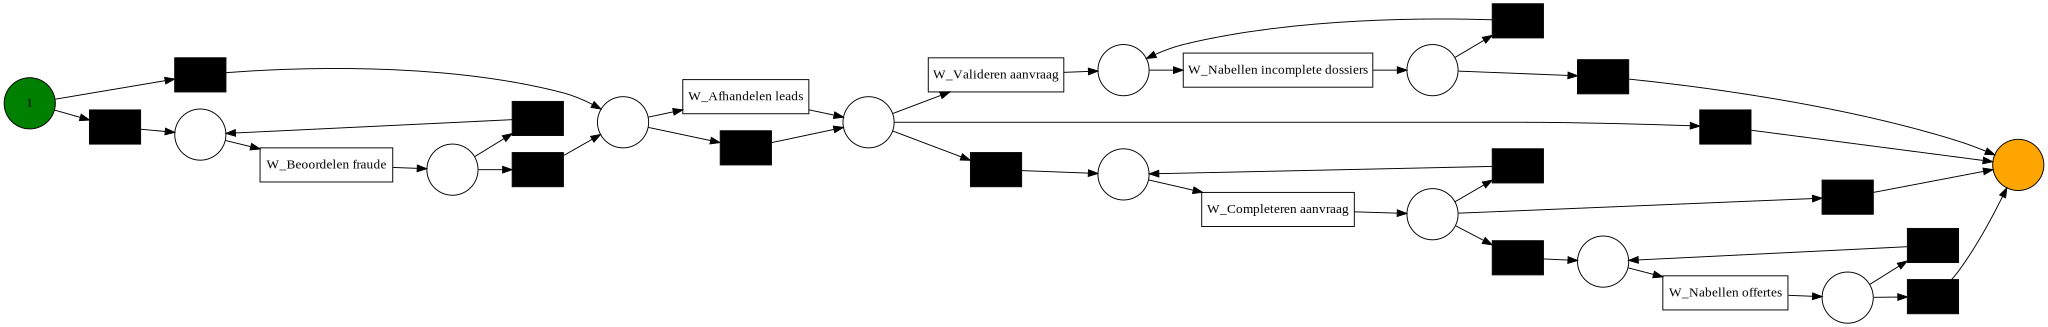

In [24]:
sim.viz.visualize_petrinet(petrinet_model)

In [25]:
simulation_graph, replay_data = sim.fitting.pre_process_input(log, petrinet_model)

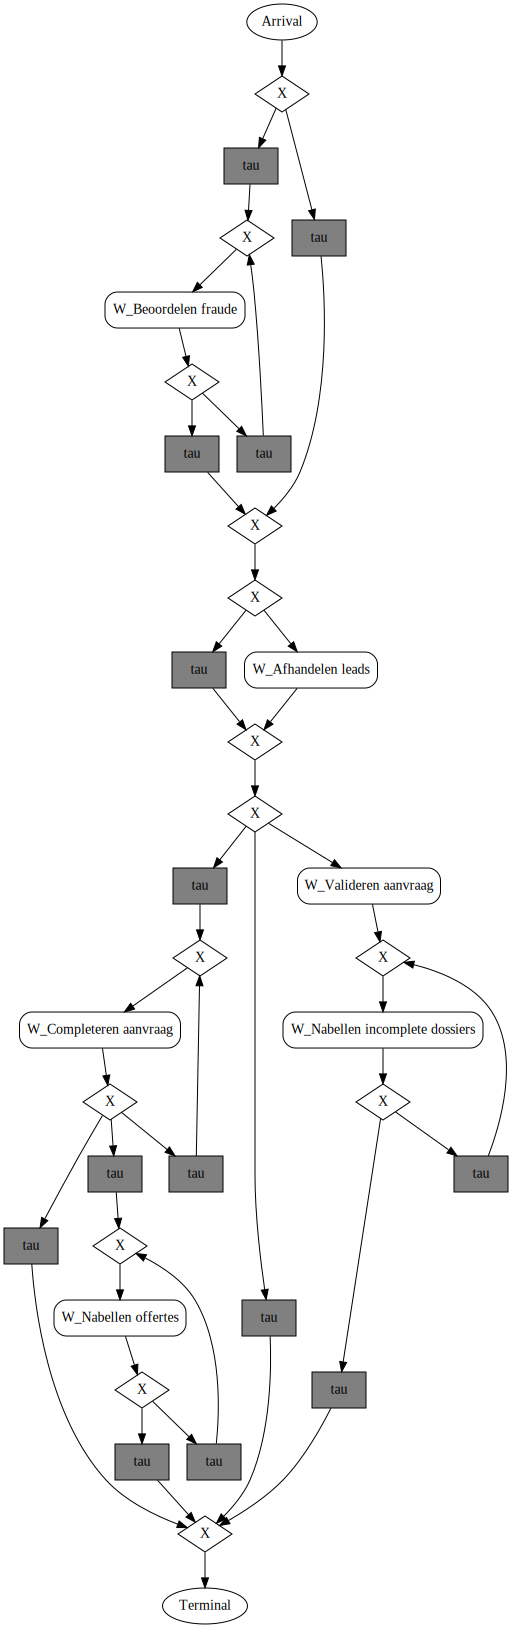

In [26]:
sim.viz.visualize_sim_graph(simulation_graph)

In [27]:
(hyper_parameters, model_configuration, simulated_log, simulated_replay_data), score, score_list, individual_score_lists = sim.fitting_machinery.fit_to_log(log, petrinet_model, simulation_graph, replay_data, time_limit=datetime.timedelta(minutes=5))

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
plt.plot(score_list)

In [ ]:
full_simulated_log = sim.simulation.simulate(sim.simulation.create_simulation_model(simulation_graph, model_configuration)).get_log()

In [ ]:
full_original_replay = sim.petrinet_replay.replay_log(full_original_log, petrinet_model)
full_simulated_replay = sim.petrinet_replay.replay_log(full_simulated_log, petrinet_model)

In [ ]:
def trackers_overview(replay):
    acs, res = replay.trace_tracker.re_replay()
    def q_plot(key):
        for a, tr in acs.items():
            sns.lineplot(data=tr.queue_model.queueing_history_df, x='time', y=key, label=f'{a}')
        plt.legend()
        plt.title(f'chronological {key}')
        plt.show()
    def p_plot(key):
        for a, tr in acs.items():
            sns.lineplot(data=tr.processing_model.processing_history_df, x='start_time', y=key, label=f'{a}')
        plt.legend()
        plt.title(f'chronological {key}')
        plt.show()
    q_plot('queue_length')
    p_plot('concurrent_items')
    sns.lineplot(data=res.assignment_counts_df, x='time', y='count', hue='resource')
    plt.show()
    print('act\tavg wait\tavg processing')
    for a, tr in acs.items():
        print(f'{a}\t{tr.queue_model.queueing_history_df["wait"].mean()}\t{tr.processing_model.processing_history_df["duration"].mean()}')

In [ ]:
full_original_replay.trace_tracker.measurements_df.groupby('activity')['concurrent_by_activity'].plot()
full_original_replay.trace_tracker.measurements_df

In [ ]:
full_simulated_replay.trace_tracker.measurements_df.groupby('activity')['concurrent_by_activity'].plot()
full_simulated_replay.trace_tracker.measurements_df

In [ ]:
sns.ecdfplot(full_original_replay.trace_tracker.measurements_df, x='total_seconds', hue='activity')

In [ ]:
sns.ecdfplot(full_simulated_replay.trace_tracker.measurements_df, x='total_seconds', hue='activity')

In [ ]:
trackers_overview(full_original_replay)

In [ ]:
trackers_overview(full_simulated_replay)